### 1. Importar les llibreries

In [190]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import hashlib
import pickle
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, make_scorer

****
### 2. Carregar el dataset

In [191]:
df = pd.read_csv('https://raw.githubusercontent.com/Nicolakorff/Projecte-Machine-Learning/refs/heads/main/bank_dataset_wins.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1033,1,-1.0,0.0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1033,1,-1.0,0.0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1033,1,-1.0,0.0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1.0,0.0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1.0,0.0,unknown,yes


****
### 3. Divisió del dataset

In [192]:
# comprovar el balanç de classes de la variable de resultat
print(df['deposit'].value_counts(normalize=True) * 100)

deposit
no     52.616019
yes    47.383981
Name: proportion, dtype: float64


In [193]:
# Després de comprovar el balanç de les classes es divideix el dataset en conjunts d'entrenament i prova en un 80/20.
# S'ha considerat el 80/20 el més adient per la quatitat de dades, el balaç de les classes i tipus diferent de dades.

# Definició de característicques (X) y variable de resultat (y).
X = df.drop(columns='deposit')  # Característiques
y = df['deposit']  # Variable de resultat

# Divisió en entrenamient (80%) y proba (20%) amb estratificació
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=22, stratify=y)

# Verificar que la proporció de classes es mante en els dos conjunts
print("Grandària del conjunt d'entrenament (train):")
print(y_train.value_counts(normalize=True))
print("Grandària del conjunt de prova (test):")
print(y_test.value_counts(normalize=True))

Grandària del conjunt d'entrenament (train):
deposit
no     0.526151
yes    0.473849
Name: proportion, dtype: float64
Grandària del conjunt de prova (test):
deposit
no     0.526198
yes    0.473802
Name: proportion, dtype: float64


In [194]:
# Desar els conjunts en fitxers CSV
X_train.to_csv('bank_dataset_X_train.csv', index=False)
X_test.to_csv('bank_dataset_X_test.csv', index=False)
y_train.to_csv('bank_dataset_y_train.csv', index=False)
y_test.to_csv('bank_dataset_y_test.csv', index=False)

# Per facilitar el codi anomenem X_train = train ; X_test = test

train = X_train
test = X_test

# Comprovar les primeres files dels conjunts
train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
4868,26.0,technician,single,secondary,no,181,no,no,cellular,20,apr,158,2,-1.000,0.0,unknown
486,26.0,services,single,secondary,no,-189,no,yes,cellular,17,jul,538,2,-1.000,0.0,unknown
2466,59.0,retired,divorced,tertiary,no,3444,no,no,cellular,10,aug,252,1,53.375,2.0,success
5952,43.0,housemaid,married,primary,no,0,yes,no,cellular,25,aug,152,3,-1.000,0.0,unknown
1721,25.0,student,single,secondary,no,1608,no,no,cellular,30,apr,664,2,-1.000,0.0,unknown


In [195]:
test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
8771,25.0,admin.,single,secondary,no,483,no,yes,cellular,30,apr,68,1,53.375,1.0,success
2823,74.5,retired,married,secondary,no,4087,no,no,telephone,23,oct,282,2,-1.000,0.0,unknown
9911,28.0,services,married,secondary,no,4,yes,no,unknown,27,jun,133,5,-1.000,0.0,unknown
5111,27.0,admin.,married,secondary,no,1595,no,no,cellular,29,dec,196,2,53.375,2.0,success
5682,36.0,management,single,tertiary,no,13,no,yes,cellular,18,nov,106,1,-1.000,0.0,unknown


- S' ajusta els conjunts train i test en transformació/codificació de variables.
- Inicialment s'aplica l'escalador unicament al conjunt de train i s´aplicar posteriorment sense ajustar al conjunt de test.

****
### 4. Transformar variables categóriques

In [196]:
# Label Encoding per 'education', 'month', 'poutcome' al ser valors ordinaris 
# Veure els valors únics a la columna 'month'
unique_month_train = train['month'].unique()
print(unique_month_train)

['apr' 'jul' 'aug' 'nov' 'jun' 'jan' 'may' 'oct' 'feb' 'dec' 'sep' 'mar']


In [197]:
# Us de OrdinalEncoder 
train2=train
test2=test
# Ordre específic
month_order = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
# Configurar l'OrdinalEncoder amb l'ordre desitjat
ordinal_encoder = OrdinalEncoder(categories=[month_order])
# Ajustar i transformar la columna
train2['month_encoded'] = ordinal_encoder.fit_transform(train[['month']])
test2['month_encoded'] = ordinal_encoder.fit_transform(test[['month']])

In [198]:
train2['month_encoded'] = train2['month_encoded'].astype(int)
test2['month_encoded'] = test2['month_encoded'].astype(int)

In [199]:
# Verificar les etiquetes amb els sus codis
print(train2[['month', 'month_encoded']].drop_duplicates())   
print(test2[['month', 'month_encoded']].drop_duplicates())

      month  month_encoded
4868    apr              3
486     jul              6
2466    aug              7
8789    nov             10
10804   jun              5
11010   jan              0
8481    may              4
7949    oct              9
4759    feb              1
3003    dec             11
3982    sep              8
1348    mar              2
      month  month_encoded
8771    apr              3
2823    oct              9
9911    jun              5
5111    dec             11
5682    nov             10
7405    jul              6
11011   may              4
1200    feb              1
7776    aug              7
4480    mar              2
8745    jan              0
10742   sep              8


In [200]:
# Eliminar columnes originals:
train2.drop("month", axis="columns", inplace=True)
test2.drop("month", axis="columns", inplace=True)

# Verificació
train2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,month_encoded
4868,26.0,technician,single,secondary,no,181,no,no,cellular,20,158,2,-1.000,0.0,unknown,3
486,26.0,services,single,secondary,no,-189,no,yes,cellular,17,538,2,-1.000,0.0,unknown,6
2466,59.0,retired,divorced,tertiary,no,3444,no,no,cellular,10,252,1,53.375,2.0,success,7
5952,43.0,housemaid,married,primary,no,0,yes,no,cellular,25,152,3,-1.000,0.0,unknown,7
1721,25.0,student,single,secondary,no,1608,no,no,cellular,30,664,2,-1.000,0.0,unknown,3


In [201]:
test2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,month_encoded
8771,25.0,admin.,single,secondary,no,483,no,yes,cellular,30,68,1,53.375,1.0,success,3
2823,74.5,retired,married,secondary,no,4087,no,no,telephone,23,282,2,-1.000,0.0,unknown,9
9911,28.0,services,married,secondary,no,4,yes,no,unknown,27,133,5,-1.000,0.0,unknown,5
5111,27.0,admin.,married,secondary,no,1595,no,no,cellular,29,196,2,53.375,2.0,success,11
5682,36.0,management,single,tertiary,no,13,no,yes,cellular,18,106,1,-1.000,0.0,unknown,10


In [202]:
# Veure els valors únics a la columna 'education'
unique_education_train = train2['education'].unique()
print(unique_education_train)

['secondary' 'tertiary' 'primary' 'unknown']


In [203]:
# Us del mappeig manual, per endreçar ordinalment escullint l'enumaració
# Especificar l'ordre amb el diccionari
education_map = {'secondary': 2, 'tertiary': 3, 'primary': 1, 'unknown': 0}

# Aplicar el mappeig a la columna
train2['education_encoded'] = train2['education'].map(education_map)
test2['education_encoded'] = test2['education'].map(education_map)

# Verificar les etiquetes amb els sus codis
print(train2[['education', 'education_encoded']].drop_duplicates())
print(test2[['education', 'education_encoded']].drop_duplicates())

      education  education_encoded
4868  secondary                  2
2466   tertiary                  3
5952    primary                  1
5250    unknown                  0
       education  education_encoded
8771   secondary                  2
5682    tertiary                  3
11097    primary                  1
3784     unknown                  0


In [204]:
# Eliminar columnes originals:
train2.drop("education", axis="columns", inplace=True)
test2.drop("education", axis="columns", inplace=True)

In [205]:
# Veure els valors únics a la columna 'poutcome'
unique_poutcome = train2['poutcome'].unique()
print(unique_poutcome)

['unknown' 'success' 'other' 'failure']


In [206]:
# Us del mappeig manual
# Especificar l'ordre amb el diccionari
poutcome_map = {'success': 3, 'failure': 2, 'other': 1, 'unknown': 0}

# Aplicar el mappeig a la columna
train2['poutcome_encoded'] = train2['poutcome'].map(poutcome_map)
test2['poutcome_encoded'] = test2['poutcome'].map(poutcome_map)

# Verificar les etiquetes amb els sus codis
print(train2[['poutcome', 'poutcome_encoded']].drop_duplicates())
print(test2[['poutcome', 'poutcome_encoded']].drop_duplicates())

     poutcome  poutcome_encoded
4868  unknown                 0
2466  success                 3
3780    other                 1
7949  failure                 2
     poutcome  poutcome_encoded
8771  success                 3
2823  unknown                 0
4319  failure                 2
3715    other                 1


In [207]:
# Eliminar columnes originals:
train2.drop("poutcome", axis="columns", inplace=True)
test2.drop("poutcome", axis="columns", inplace=True)

In [208]:
# Transformació de la variable 'job' fent una agrupació de les categories per reduir dimensionalitat
unique_job = train2['job'].unique()
print(unique_job)

['technician' 'services' 'retired' 'housemaid' 'student' 'management'
 'unemployed' 'admin.' 'self-employed' 'entrepreneur' 'blue-collar'
 'unknown']


In [209]:
# Agrupació de la variable 'job'
# Mappeig
job_groups = {
    'admin.': 'qualified',
    'blue-collar': 'qualified',
    'technician': 'qualified',
    'management': 'qualified',
    'services': 'semi-qualified',
    'entrepreneur': 'freelance',
    'self-employed': 'freelance',
    'student': 'no qualified',
    'retired': 'qualified',
    'unemployed': 'no qualified',
    'housemaid': 'semi-qualified',
    'unknown': 'other'
}

In [210]:
# Aplicar el mappeig per agrupar categories
train2['job_grouped'] = train2['job'].map(job_groups)
test2['job_grouped'] = test2['job'].map(job_groups)

# Verificar la nova columna
print(train2[['job', 'job_grouped']].drop_duplicates()) 
print(test2[['job', 'job_grouped']].drop_duplicates()) 

                job     job_grouped
4868     technician       qualified
486        services  semi-qualified
2466        retired       qualified
5952      housemaid  semi-qualified
1721        student    no qualified
8789     management       qualified
3819     unemployed    no qualified
7949         admin.       qualified
4962  self-employed       freelance
4870   entrepreneur       freelance
9634    blue-collar       qualified
3253        unknown           other
                job     job_grouped
8771         admin.       qualified
2823        retired       qualified
9911       services  semi-qualified
5682     management       qualified
7405  self-employed       freelance
3772     technician       qualified
2609     unemployed    no qualified
5243    blue-collar       qualified
3511        unknown           other
2069      housemaid  semi-qualified
3326        student    no qualified
9393   entrepreneur       freelance


In [211]:
# Convertir a valors numerics
job_group_mapping = {'semi-qualified': 3, 'qualified': 2, 'retired': 0, 'other': 5, 'no qualified': 4, 'freelance': 1}
train2['job_grouped_encoded'] = train2['job_grouped'].map(job_group_mapping)
test2['job_grouped_encoded'] = test2['job_grouped'].map(job_group_mapping)

# Verificar los valores codificados
print(train2[['job_grouped', 'job_grouped_encoded']].drop_duplicates())
print(test2[['job_grouped', 'job_grouped_encoded']].drop_duplicates())

         job_grouped  job_grouped_encoded
4868       qualified                    2
486   semi-qualified                    3
1721    no qualified                    4
4962       freelance                    1
3253           other                    5
         job_grouped  job_grouped_encoded
8771       qualified                    2
9911  semi-qualified                    3
7405       freelance                    1
2609    no qualified                    4
3511           other                    5


In [212]:
# Eliminar columnes originals:
train2.drop("job", axis="columns", inplace=True)
test2.drop("job", axis="columns", inplace=True)

# Verificació:
train2.head()

,age,marital,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,month_encoded,education_encoded,poutcome_encoded,job_grouped,job_grouped_encoded
4868,26.0,single,no,181,no,no,cellular,20,158,2,-1.000,0.0,3,2,0,qualified,2
486,26.0,single,no,-189,no,yes,cellular,17,538,2,-1.000,0.0,6,2,0,semi-qualified,3
2466,59.0,divorced,no,3444,no,no,cellular,10,252,1,53.375,2.0,7,3,3,qualified,2
5952,43.0,married,no,0,yes,no,cellular,25,152,3,-1.000,0.0,7,1,0,semi-qualified,3
1721,25.0,single,no,1608,no,no,cellular,30,664,2,-1.000,0.0,3,2,0,no qualified,4


In [213]:
test2.head()

,age,marital,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,month_encoded,education_encoded,poutcome_encoded,job_grouped,job_grouped_encoded
8771,25.0,single,no,483,no,yes,cellular,30,68,1,53.375,1.0,3,2,3,qualified,2
2823,74.5,married,no,4087,no,no,telephone,23,282,2,-1.000,0.0,9,2,0,qualified,2
9911,28.0,married,no,4,yes,no,unknown,27,133,5,-1.000,0.0,5,2,0,semi-qualified,3
5111,27.0,married,no,1595,no,no,cellular,29,196,2,53.375,2.0,11,2,3,qualified,2
5682,36.0,single,no,13,no,yes,cellular,18,106,1,-1.000,0.0,10,3,0,qualified,2


In [214]:
# One-Hot Encoding per 'loan', 'housing', 'deafult', 'marital', 'contact', ja que no es poden ordenar de foma ordinal
train3 = train2
test3 = test2

In [215]:
# Utilitzar get_dummies per a 'loan', 'housing', 'deafult', al ser columnes amb valors binaris
train3 = pd.get_dummies(train3, columns=['loan'], prefix='loan')
train3 = pd.get_dummies(train3, columns=['housing'], prefix='housing')
train3 = pd.get_dummies(train3, columns=['default'], prefix='default')
test3 = pd.get_dummies(test3, columns=['loan'], prefix='loan')
test3 = pd.get_dummies(test3, columns=['housing'], prefix='housing')
test3 = pd.get_dummies(test3, columns=['default'], prefix='default')

In [216]:
# Verificar les etiquetes amb els sus codis
print(train3[['loan_yes', 'loan_no']].drop_duplicates())
print(test3[['loan_yes', 'loan_no']].drop_duplicates())
print(train3[['housing_yes', 'housing_no']].drop_duplicates())
print(test3[['housing_yes', 'housing_no']].drop_duplicates())
print(train3[['default_yes', 'default_no']].drop_duplicates())
print(test3[['default_yes', 'default_no']].drop_duplicates())

      loan_yes  loan_no
4868     False     True
486       True    False
      loan_yes  loan_no
8771      True    False
2823     False     True
      housing_yes  housing_no
4868        False        True
5952         True       False
      housing_yes  housing_no
8771        False        True
9911         True       False
      default_yes  default_no
4868        False        True
7494         True       False
      default_yes  default_no
8771        False        True
7373         True       False


In [217]:
# Verificació
train3.head()

,age,marital,balance,contact,day,duration,campaign,pdays,previous,month_encoded,education_encoded,poutcome_encoded,job_grouped,job_grouped_encoded,loan_no,loan_yes,housing_no,housing_yes,default_no,default_yes
4868,26.0,single,181,cellular,20,158,2,-1.000,0.0,3,2,0,qualified,2,True,False,True,False,True,False
486,26.0,single,-189,cellular,17,538,2,-1.000,0.0,6,2,0,semi-qualified,3,False,True,True,False,True,False
2466,59.0,divorced,3444,cellular,10,252,1,53.375,2.0,7,3,3,qualified,2,True,False,True,False,True,False
5952,43.0,married,0,cellular,25,152,3,-1.000,0.0,7,1,0,semi-qualified,3,True,False,False,True,True,False
1721,25.0,single,1608,cellular,30,664,2,-1.000,0.0,3,2,0,no qualified,4,True,False,True,False,True,False


In [218]:
test3.head()

,age,marital,balance,contact,day,duration,campaign,pdays,previous,month_encoded,education_encoded,poutcome_encoded,job_grouped,job_grouped_encoded,loan_no,loan_yes,housing_no,housing_yes,default_no,default_yes
8771,25.0,single,483,cellular,30,68,1,53.375,1.0,3,2,3,qualified,2,False,True,True,False,True,False
2823,74.5,married,4087,telephone,23,282,2,-1.000,0.0,9,2,0,qualified,2,True,False,True,False,True,False
9911,28.0,married,4,unknown,27,133,5,-1.000,0.0,5,2,0,semi-qualified,3,True,False,False,True,True,False
5111,27.0,married,1595,cellular,29,196,2,53.375,2.0,11,2,3,qualified,2,True,False,True,False,True,False
5682,36.0,single,13,cellular,18,106,1,-1.000,0.0,10,3,0,qualified,2,False,True,True,False,True,False


In [219]:
# Utilitzar get_dummies per a la variable de resultat'deposit', també de valors binaris
y_train = pd.get_dummies(y_train, columns=['deposit'], prefix='deposit')
y_test = pd.get_dummies(y_test, columns=['deposit'], prefix='deposit')
# Verificar les etiquetes amb els sus codis
print(y_train[['deposit_yes', 'deposit_no']].drop_duplicates())
print(y_test[['deposit_yes', 'deposit_no']].drop_duplicates())

      deposit_yes  deposit_no
4868         True       False
5952        False        True
      deposit_yes  deposit_no
8771        False        True
2823         True       False


In [220]:
train4=train3
test4=test3

In [221]:
# Crear y ajustar el OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(train4[['marital']])

# Codificar
marital_encoded_train = encoder.transform(train4[['marital']])
marital_encoded_test = encoder.transform(test4[['marital']])

# Crear un DataFrame para la codificación de 'marital'
marital_encoded_train_df = pd.DataFrame(marital_encoded_train, columns=encoder.get_feature_names_out(['marital']))
marital_encoded_test_df = pd.DataFrame(marital_encoded_test, columns=encoder.get_feature_names_out(['marital']))

# Resetear los índices para asegurar alineación
train4 = train4.reset_index(drop=True)
marital_encoded_train_df = marital_encoded_train_df.reset_index(drop=True)
test4 = test4.reset_index(drop=True)
marital_encoded_test_df = marital_encoded_test_df.reset_index(drop=True)

# Concatenar los DataFrames con el eje correcto (axis=1) para agregar las columnas codificadas
train4 = pd.concat([train4, marital_encoded_train_df], axis=1)
test4 = pd.concat([test4, marital_encoded_test_df], axis=1)

# Verificar las columnas generadas
print("Nuevas columnas codificadas:", encoder.get_feature_names_out(['marital']))
print("Dimensiones después de concatenar:")
print("train4:", train4.shape)
print("test4:", test4.shape)

Nuevas columnas codificadas: ['marital_divorced' 'marital_married' 'marital_single' 'marital_unknown']
Dimensiones después de concatenar:
train4: (8929, 24)
test4: (2233, 24)


In [222]:
# Crear y ajustar el OneHotEncoder
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoder.fit(train4[['contact']])

# Codificar
contact_encoded_train = encoder.transform(train4[['contact']])
contact_encoded_test = encoder.transform(test4[['contact']])

# Crear un DataFrame para la codificación de 'contact'
contact_encoded_train_df = pd.DataFrame(contact_encoded_train, columns=encoder.get_feature_names_out(['contact']))
contact_encoded_test_df = pd.DataFrame(contact_encoded_test, columns=encoder.get_feature_names_out(['contact']))

# Resetear los índices para asegurar alineación
train4 = train4.reset_index(drop=True)
contact_encoded_train_df = contact_encoded_train_df.reset_index(drop=True)
test4 = test4.reset_index(drop=True)
contact_encoded_test_df = contact_encoded_test_df.reset_index(drop=True)

# Concatenar los DataFrames con el eje correcto (axis=1) para agregar las columnas codificadas
train4 = pd.concat([train4, contact_encoded_train_df], axis=1)
test4 = pd.concat([test4, contact_encoded_test_df], axis=1)

# Verificar las columnas generadas
print("Nuevas columnas codificadas:", encoder.get_feature_names_out(['contact']))
print("Dimensiones después de concatenar:")
print("train4:", train4.shape)
print("test4:", test4.shape)

Nuevas columnas codificadas: ['contact_cellular' 'contact_telephone' 'contact_unknown']
Dimensiones después de concatenar:
train4: (8929, 27)
test4: (2233, 27)


In [223]:
# Eliminar columnes originals:
train4.drop("marital", axis="columns", inplace=True)
test4.drop("marital", axis="columns", inplace=True)
train4.drop("contact", axis="columns", inplace=True)
test4.drop("contact", axis="columns", inplace=True)

In [224]:
# Verificar:
train4.head()

,age,balance,day,duration,campaign,pdays,previous,month_encoded,education_encoded,poutcome_encoded,...,housing_yes,default_no,default_yes,marital_divorced,marital_married,marital_single,marital_unknown,contact_cellular,contact_telephone,contact_unknown
0,26.0,181,20,158,2,-1.000,0.0,3,2,0,...,False,True,False,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,26.0,-189,17,538,2,-1.000,0.0,6,2,0,...,False,True,False,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,59.0,3444,10,252,1,53.375,2.0,7,3,3,...,False,True,False,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,43.0,0,25,152,3,-1.000,0.0,7,1,0,...,True,True,False,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,25.0,1608,30,664,2,-1.000,0.0,3,2,0,...,False,True,False,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [225]:
test4.head()

,age,balance,day,duration,campaign,pdays,previous,month_encoded,education_encoded,poutcome_encoded,...,housing_yes,default_no,default_yes,marital_divorced,marital_married,marital_single,marital_unknown,contact_cellular,contact_telephone,contact_unknown
0,25.0,483,30,68,1,53.375,1.0,3,2,3,...,False,True,False,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,74.5,4087,23,282,2,-1.000,0.0,9,2,0,...,False,True,False,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,4,27,133,5,-1.000,0.0,5,2,0,...,True,True,False,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,27.0,1595,29,196,2,53.375,2.0,11,2,3,...,False,True,False,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,36.0,13,18,106,1,-1.000,0.0,10,3,0,...,False,True,False,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [226]:
# Desar el DataFrame estandarditzat en un fitxer CSV
train4.to_csv('bank_dataset_X_train_stand.csv', index=False)
test4.to_csv('bank_dataset_X_test_stand.csv', index=False)
y_train.to_csv('bank_dataset_X_test_stand.csv', index=False)
y_test.to_csv('bank_dataset_X_test_stand.csv', index=False)

****
### 5. Estandarització o Normalització de les dades

**5.1 Tractactament d'outliers al conjunt train**

In [227]:
## Detecció d'outliers
# Llistar columnes a detectar outliers
columns_to_check = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']

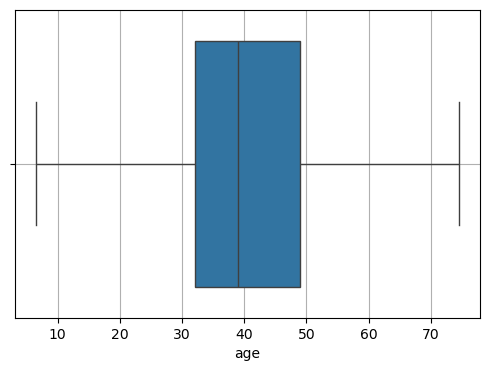

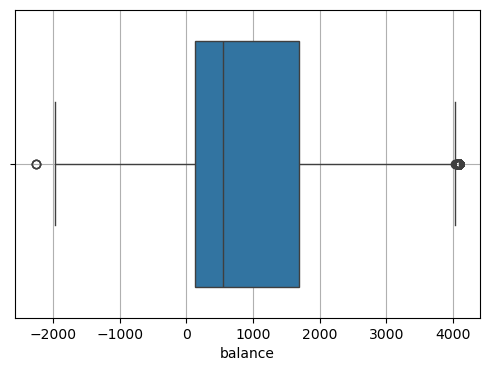

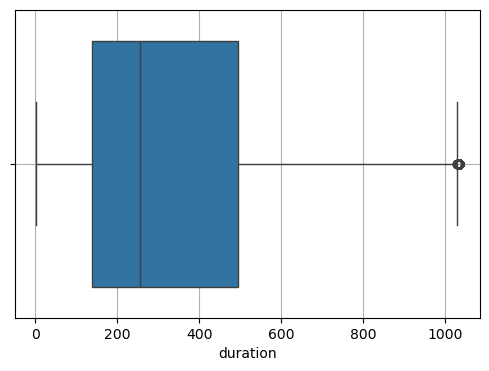

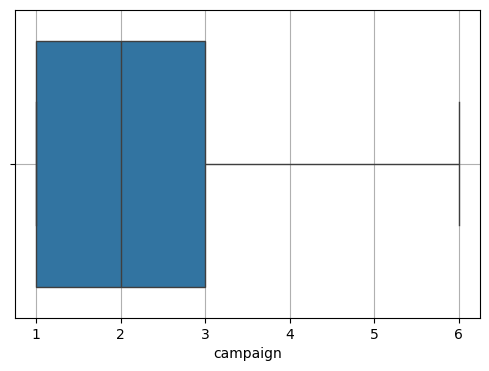

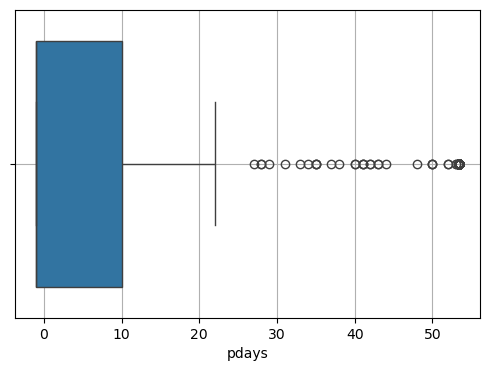

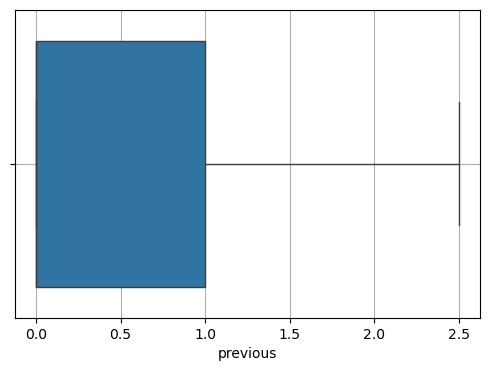

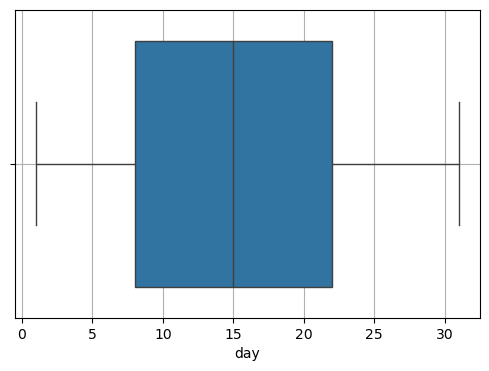

In [228]:
# Crear diagrames de caixa per visualitzar outliers a cada columna
for column in columns_to_check:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=train4[column])
    plt.xlabel(column)
    plt.grid(True)
    plt.show() # S'han detectat outliers a 'balance', 'duration' i 'pdays'. La que sembla que té més és 'pdays'.

In [229]:
# Tractar outliers aplicant la técnica de Winsorització per mantenir l'estructura del dataset
# Funció per calcular límits IQR
def calculate_iqr_limits(train4, columns):
    limits_dict = {}
    
    for column in columns:
        Q1 = train4[column].quantile(0.25)
        Q3 = train4[column].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        limits_dict[column] = (lower_bound, upper_bound)
        
    return limits_dict

In [230]:
# Funció per winsoritzar dades
def winsorize_data(train4, columns):
    limits_dict = calculate_iqr_limits(train4, columns)
    
    for column, (lower_bound, upper_bound) in limits_dict.items():
        # Winsoritzar: Reemplaçar valors menors al límit inferior i majores al límit superior
        train4[column] = np.clip(train4[column], lower_bound, upper_bound)
        
    return train4

In [231]:
# Definir les columnas a winsoritzar
columns_to_check = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']

# Aplicar winsorització a les columnes especificades
train_winsorized = winsorize_data(train4, columns_to_check)

# Guardar el DataFrame en un archiu CSV
train_winsorized.to_csv('bank_dataset_X_train_stand.csv', index=False)

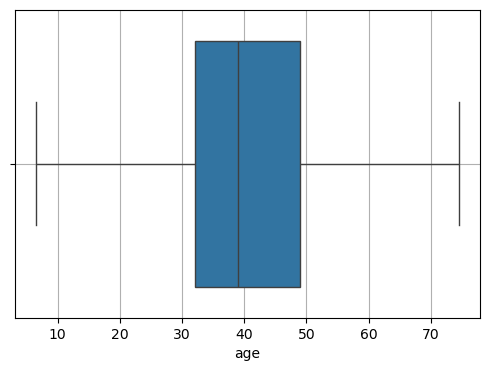

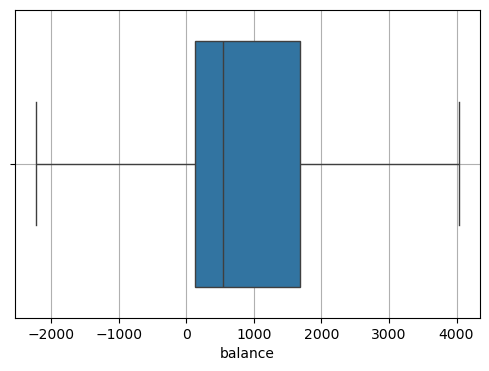

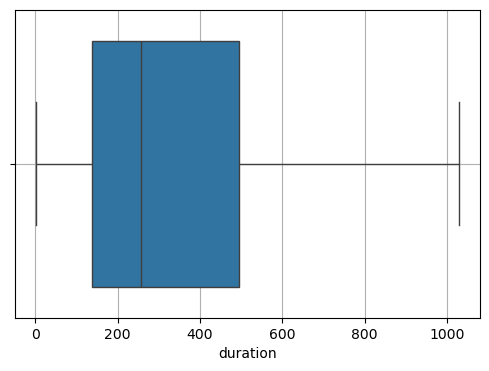

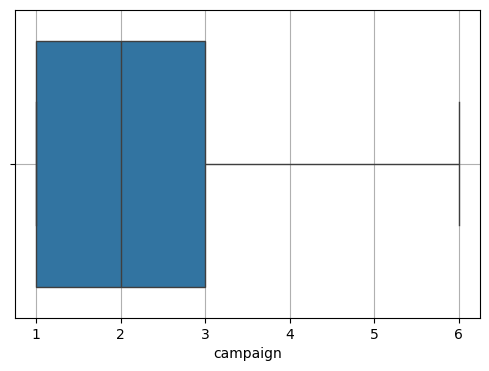

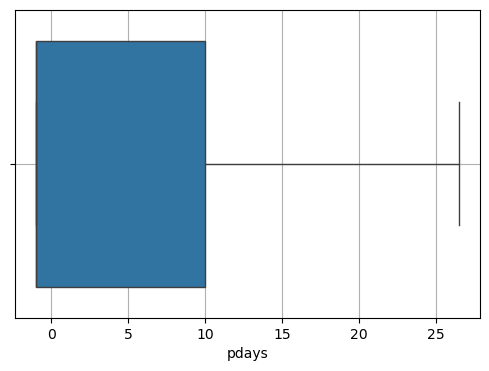

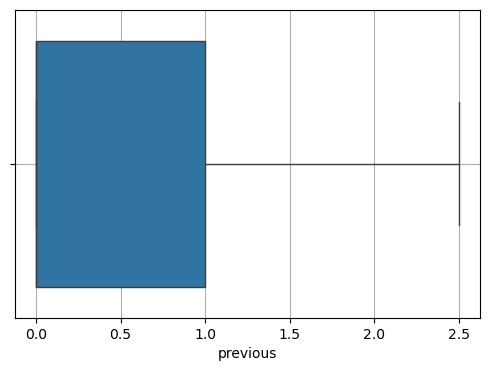

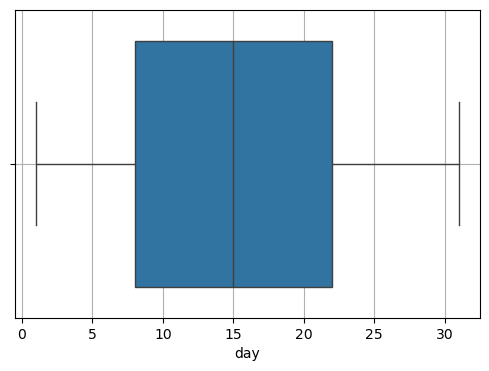

In [232]:
# Comprobar que no hi hagi outliers
for column in columns_to_check:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=train4[column])
    plt.xlabel(column)
    plt.grid(True)
    plt.show() # No es detecten outliers

In [233]:
# Mostrar les primeres 5 filas del DataFrame `train4`
train4.head()

,age,balance,day,duration,campaign,pdays,previous,month_encoded,education_encoded,poutcome_encoded,...,housing_yes,default_no,default_yes,marital_divorced,marital_married,marital_single,marital_unknown,contact_cellular,contact_telephone,contact_unknown
0,26.0,181,20,158,2,-1.0,0.0,3,2,0,...,False,True,False,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,26.0,-189,17,538,2,-1.0,0.0,6,2,0,...,False,True,False,0.0,0.0,1.0,0.0,1.0,0.0,0.0
2,59.0,3444,10,252,1,26.5,2.0,7,3,3,...,False,True,False,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,43.0,0,25,152,3,-1.0,0.0,7,1,0,...,True,True,False,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,25.0,1608,30,664,2,-1.0,0.0,3,2,0,...,False,True,False,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [234]:
# Obtenir una descripció estadística del DataFrame `train4`
train4.describe()

,age,balance,day,duration,campaign,pdays,previous,month_encoded,education_encoded,poutcome_encoded,job_grouped_encoded,marital_divorced,marital_married,marital_single,marital_unknown,contact_cellular,contact_telephone,contact_unknown
count,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000
mean,41.166816,1102.708254,15.716542,351.826632,2.236085,5.876862,0.483985,5.191287,2.106171,0.555941,2.192631,0.114459,0.569493,0.315601,0.000448,0.720349,0.069101,0.210550
std,11.701986,1334.265759,8.438221,282.141978,1.523646,11.883829,0.892252,2.572412,0.797436,1.023268,0.676397,0.318385,0.495175,0.464781,0.021162,0.448853,0.253639,0.407722
min,6.500000,-2224.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,4.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,39.000000,546.000000,15.000000,256.000000,2.000000,-1.000000,0.000000,5.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,49.000000,1686.000000,22.000000,494.000000,3.000000,10.000000,1.000000,7.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,74.500000,4032.000000,31.000000,1028.000000,6.000000,26.500000,2.500000,11.000000,3.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


****
**5.2 Tractactament d'outliers al conjunt test**

In [235]:
## Detecció d'outliers
# Llistar columnes a detectar outliers
columns_to_check = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']

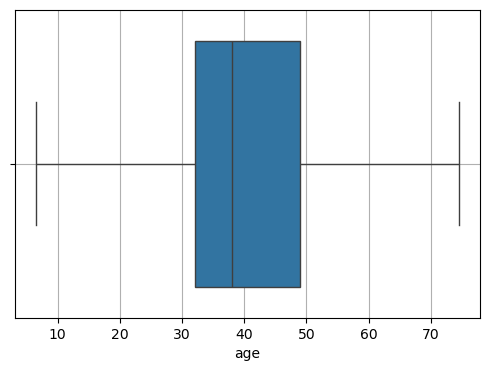

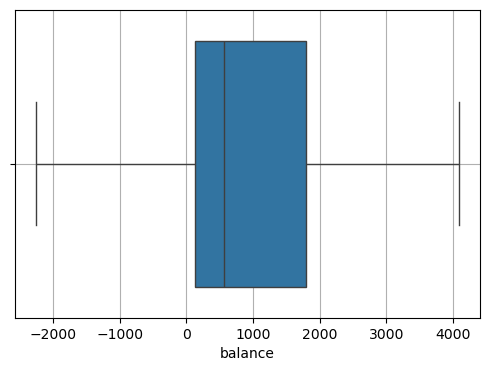

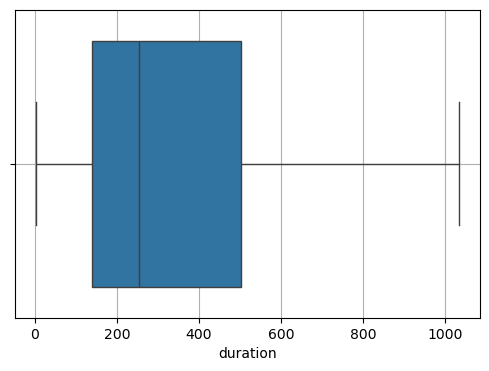

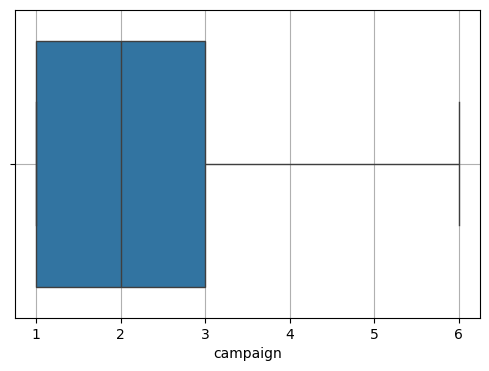

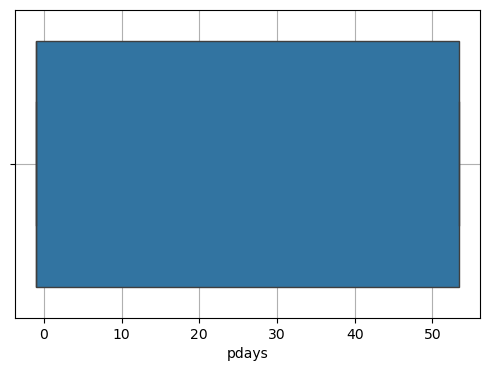

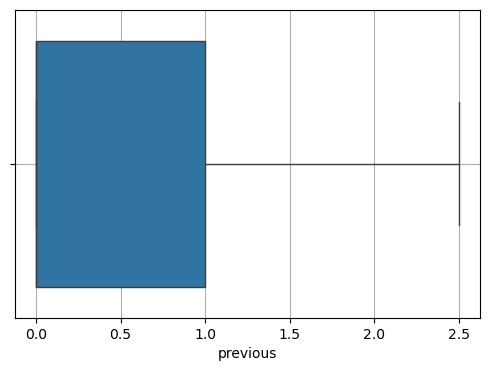

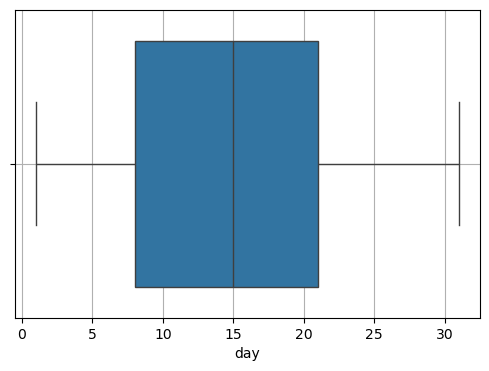

In [236]:
# Crear diagrames de caixa per visualitzar outliers a cada columna
for column in columns_to_check:
    plt.figure(figsize=(6, 4))
    sns.boxplot(x=test4[column])
    plt.xlabel(column)
    plt.grid(True)
    plt.show() # No s'han detectat outliers.

In [237]:
# Mostrar les primeres 5 filas del DataFrame `train4`
test4.head()

,age,balance,day,duration,campaign,pdays,previous,month_encoded,education_encoded,poutcome_encoded,...,housing_yes,default_no,default_yes,marital_divorced,marital_married,marital_single,marital_unknown,contact_cellular,contact_telephone,contact_unknown
0,25.0,483,30,68,1,53.375,1.0,3,2,3,...,False,True,False,0.0,0.0,1.0,0.0,1.0,0.0,0.0
1,74.5,4087,23,282,2,-1.000,0.0,9,2,0,...,False,True,False,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28.0,4,27,133,5,-1.000,0.0,5,2,0,...,True,True,False,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,27.0,1595,29,196,2,53.375,2.0,11,2,3,...,False,True,False,0.0,1.0,0.0,0.0,1.0,0.0,0.0
4,36.0,13,18,106,1,-1.000,0.0,10,3,0,...,False,True,False,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [238]:
# Obtenir una descripció estadística del DataFrame `train4`
test4.describe()

,age,balance,day,duration,campaign,pdays,previous,month_encoded,education_encoded,poutcome_encoded,job_grouped_encoded,marital_divorced,marital_married,marital_single,marital_unknown,contact_cellular,contact_telephone,contact_unknown
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000
mean,40.956113,1155.190327,15.424093,356.317510,2.248545,12.842085,0.491043,5.188983,2.103448,0.556202,2.173757,0.120466,0.566055,0.313032,0.000448,0.721003,0.070309,0.208688
std,11.699717,1364.910971,8.348250,292.236609,1.511464,23.622936,0.893981,2.574886,0.790599,1.012732,0.650538,0.325578,0.495729,0.463831,0.021162,0.448606,0.255724,0.406462
min,6.500000,-2257.000000,1.000000,3.000000,1.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,126.000000,8.000000,139.000000,1.000000,-1.000000,0.000000,4.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,38.000000,560.000000,15.000000,254.000000,2.000000,-1.000000,0.000000,5.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,49.000000,1794.000000,21.000000,503.000000,3.000000,53.375000,1.000000,7.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,74.500000,4087.000000,31.000000,1033.000000,6.000000,53.375000,2.500000,11.000000,3.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


**5.3 Estandarització de variables numériques del conjunt train i test**

In [239]:
train5=train4
test5=test4

In [240]:
# Convé estandaritzar les variables numèriques que tenen una escala àmplia i que podrien afectar els models
# Especificar les columnes numèriques a estandarditzar
columns_to_standardize = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']

In [242]:
# Inicialitzar l'escalador
scaler = StandardScaler()

# Ajustar el escalador con el conjunto de entrenamiento
scaler.fit(train5[columns_to_standardize])

# Aplicar l'estandardització només a les columnes numèriques
train5[columns_to_standardize] = scaler.transform(train5[columns_to_standardize])
test5[columns_to_standardize] = scaler.transform(test5[columns_to_standardize])

# Guardar el DataFrame estandaritzat en el mateix archiu CSV
train5.to_csv('bank_dataset_X_train_stand.csv', index=False)
test5.to_csv('bank_dataset_X_train_stand.csv', index=False)

# Verificar la media de las columnas en train4
print(train5[columns_to_standardize].mean())
print(test5[columns_to_standardize].mean())

age         1.193655e-17
balance    -5.570388e-18
duration    1.870059e-17
campaign    2.586251e-17
pdays       5.092926e-17
previous   -3.043819e-17
day         1.909847e-17
dtype: float64
age        -0.018007
balance     0.039336
duration    0.015918
campaign    0.008178
pdays       0.586142
previous    0.007912
day        -0.034660
dtype: float64


In [243]:
# Comprobar la media de las columnas estandarizadas en train4
print("Media de cada columna en train4 después de estandarización:")
print(train5[columns_to_standardize].mean())

# Comprobar la desviación estándar de las columnas estandarizadas en train4
print("\nDesviación estándar de cada columna en train4 después de estandarización:")
print(train5[columns_to_standardize].std())

Media de cada columna en train4 después de estandarización:
age         1.193655e-17
balance    -5.570388e-18
duration    1.870059e-17
campaign    2.586251e-17
pdays       5.092926e-17
previous   -3.043819e-17
day         1.909847e-17
dtype: float64

Desviación estándar de cada columna en train4 después de estandarización:
age         1.000056
balance     1.000056
duration    1.000056
campaign    1.000056
pdays       1.000056
previous    1.000056
day         1.000056
dtype: float64


In [244]:
print("Media utilizada en el ajuste:")
print(scaler.mean_)
print("\nDesviación estándar utilizada en el ajuste:")
print(scaler.scale_)

Media utilizada en el ajuste:
[ 2.99209395e-16  6.70435945e-17  1.87005872e-17  3.02392474e-17
  8.35558150e-18 -3.04381898e-17  8.47494695e-17]

Desviación estándar utilizada en el ajuste:
[1. 1. 1. 1. 1. 1. 1.]


In [245]:
# Verificar estandarització.
train5.describe()

,age,balance,day,duration,campaign,pdays,previous,month_encoded,education_encoded,poutcome_encoded,job_grouped_encoded,marital_divorced,marital_married,marital_single,marital_unknown,contact_cellular,contact_telephone,contact_unknown
count,8.929000e+03,8.929000e+03,8.929000e+03,8.929000e+03,8.929000e+03,8.929000e+03,8.929000e+03,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000,8929.000000
mean,1.193655e-17,-5.570388e-18,1.909847e-17,1.870059e-17,2.586251e-17,5.092926e-17,-3.043819e-17,5.191287,2.106171,0.555941,2.192631,0.114459,0.569493,0.315601,0.000448,0.720349,0.069101,0.210550
std,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,1.000056e+00,2.572412,0.797436,1.023268,0.676397,0.318385,0.495175,0.464781,0.021162,0.448853,0.253639,0.407722
min,-2.962639e+00,-2.493427e+00,-1.744131e+00,-1.239965e+00,-8.113129e-01,-5.787063e-01,-5.424607e-01,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-7.833995e-01,-7.350583e-01,-9.145261e-01,-7.579113e-01,-8.113129e-01,-5.787063e-01,-5.424607e-01,4.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.851769e-01,-4.172628e-01,-8.492094e-02,-3.396588e-01,-1.549558e-01,-5.787063e-01,-5.424607e-01,5.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,6.694268e-01,4.371876e-01,7.446842e-01,5.039354e-01,5.014012e-01,3.469731e-01,5.783611e-01,7.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,2.848666e+00,2.195556e+00,1.811319e+00,2.396706e+00,2.470472e+00,1.735492e+00,2.259594e+00,11.000000,3.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


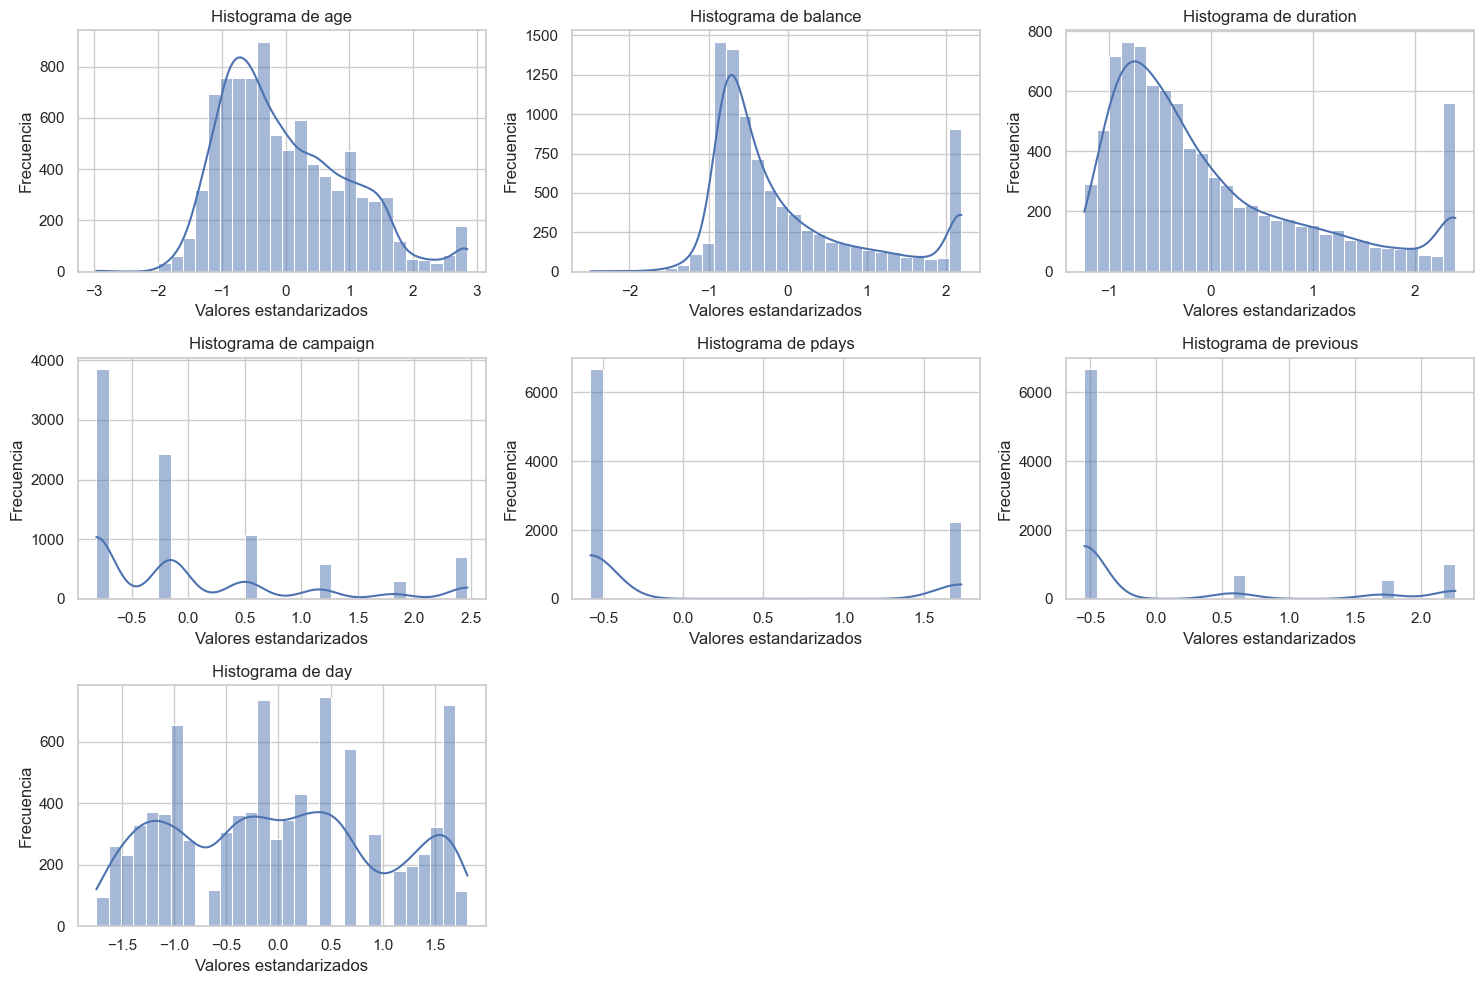

In [259]:
# Selecciona las variables estandarizadas en train4
variables_estandarizadas = train5[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']]

# Configurar el tamaño del gráfico y el estilo
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Crear histogramas para cada variable
for i, column in enumerate(variables_estandarizadas.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(variables_estandarizadas[column], bins=30, kde=True)
    plt.title(f'Histograma de {column}')
    plt.xlabel('Valores estandarizados')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

In [247]:
# Verificar estandarització.
test5.describe()

,age,balance,day,duration,campaign,pdays,previous,month_encoded,education_encoded,poutcome_encoded,job_grouped_encoded,marital_divorced,marital_married,marital_single,marital_unknown,contact_cellular,contact_telephone,contact_unknown
count,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000,2233.000000
mean,-0.018007,0.039336,-0.034660,0.015918,0.008178,0.586142,0.007912,5.188983,2.103448,0.556202,2.173757,0.120466,0.566055,0.313032,0.000448,0.721003,0.070309,0.208688
std,0.999862,1.023025,0.989393,1.035837,0.992060,1.987933,1.001994,2.574886,0.790599,1.012732,0.650538,0.325578,0.495729,0.463831,0.021162,0.448606,0.255724,0.406462
min,-2.962639,-2.518161,-1.744131,-1.236421,-0.811313,-0.578706,-0.542461,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.783399,-0.732060,-0.914526,-0.754367,-0.811313,-0.578706,-0.542461,4.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.270637,-0.406770,-0.084921,-0.346748,-0.154956,-0.578706,-0.542461,5.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.669427,0.518136,0.626169,0.535836,0.501401,3.997095,0.578361,7.000000,3.000000,1.000000,2.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000
max,2.848666,2.236780,1.811319,2.414428,2.470472,3.997095,2.259594,11.000000,3.000000,3.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


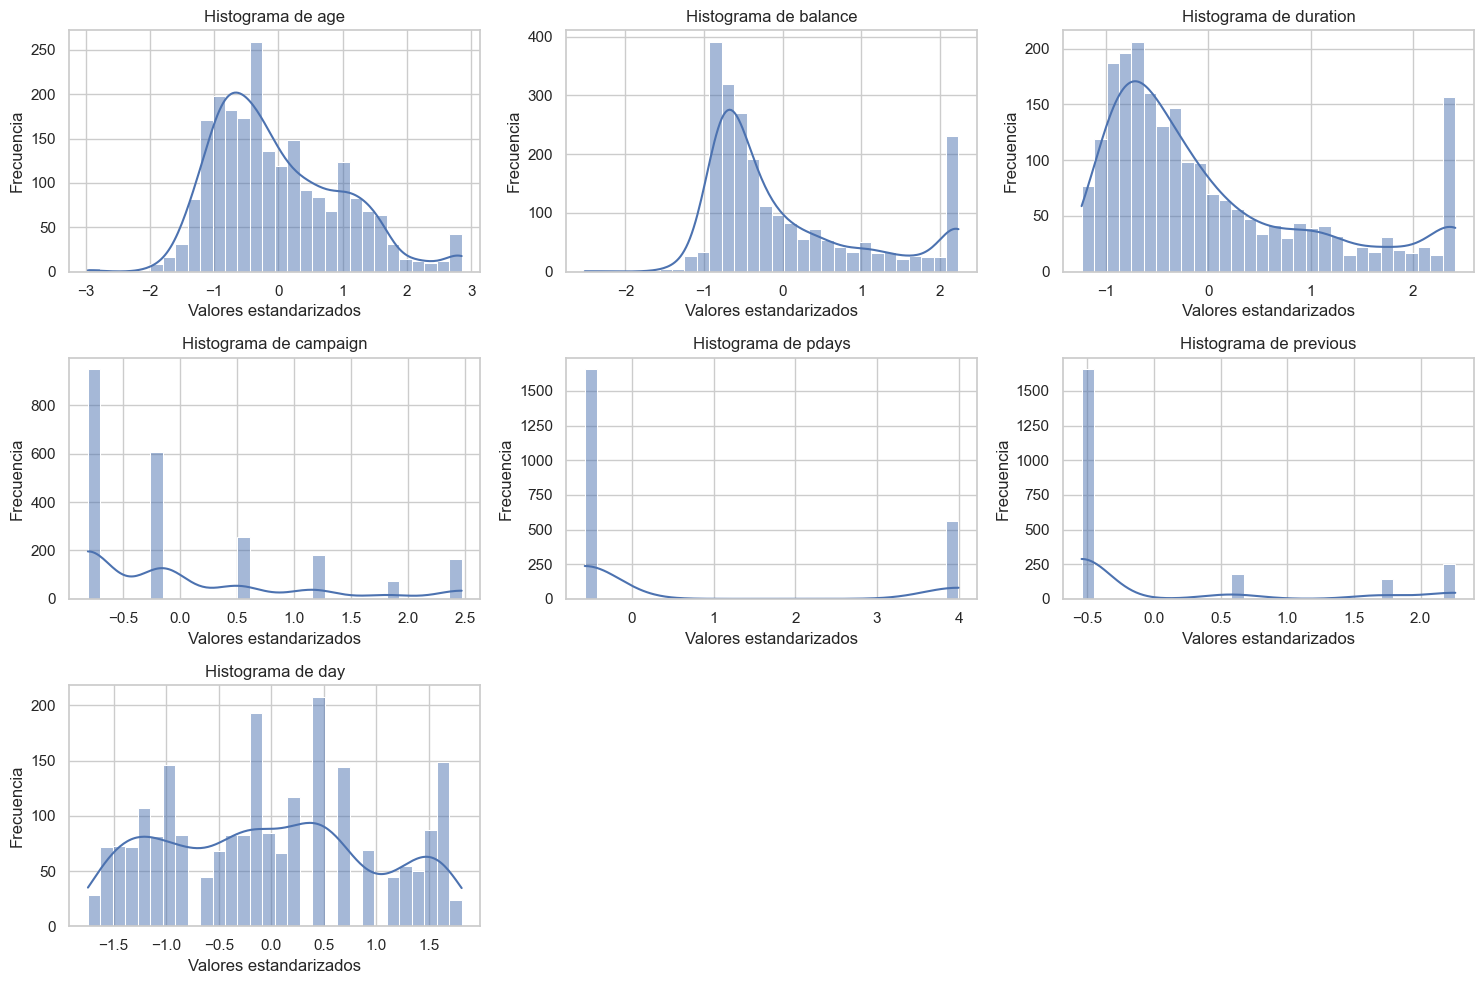

In [260]:
# Selecciona las variables estandarizadas en train4
variables_estandarizadas = test5[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous', 'day']]

# Configurar el tamaño del gráfico y el estilo
plt.figure(figsize=(15, 10))
sns.set(style="whitegrid")

# Crear histogramas para cada variable
for i, column in enumerate(variables_estandarizadas.columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(variables_estandarizadas[column], bins=30, kde=True)
    plt.title(f'Histograma de {column}')
    plt.xlabel('Valores estandarizados')
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()

****